# 1. Import the required libraries

In [1]:
##---------Type the code below this line------------------##
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.__version__

'2.10.0'

In [4]:
tf.test.is_built_with_cuda()

False

In [5]:
tf.debugging.set_log_device_placement(True)

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [6]:
##---------Type the code below this line------------------##
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

## 2.1 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label. 

In [7]:
#--------------Type the  below this line--------------
################################################################
# 2.1.1.: Size of the dataset
################################################################
print("Training dataset size: ", x_train.shape)
print("Test dataset size: ", x_test.shape)

Training dataset size:  (50000, 32, 32, 3)
Test dataset size:  (10000, 32, 32, 3)


In [8]:
################################################################
# 2.1.2.: What type of data attributes are there?
################################################################
print("The datatype of the training dataset is", type(x_train))
print("The unique target values are", np.unique(y_train))
print("The unique training values are", np.unique(x_train))
################################################################################################################################
# From the output of the above statements, it's clear that we are dealing with numerical data attributes.
#   - the input numerical values images of size 32x32 pixels with 3 color channels
#   - the target numerical values represent the following labels
#       Label	Description
#       0	airplane
#       1	automobile
#       2	bird
#       3	cat
#       4	deer
#       5	dog
#       6	frog
#       7	horse
#       8	ship
#       9	truck
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
################################################################################################################################

The datatype of the training dataset is <class 'numpy.ndarray'>
The unique target values are [0 1 2 3 4 5 6 7 8 9]
The unique training values are [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 21

In [9]:
################################################################################################################################
# 2.1.3. What are you classifying?
# We are classifying small color images of size 32x32, labeled over 10 categories.
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
################################################################################################################################

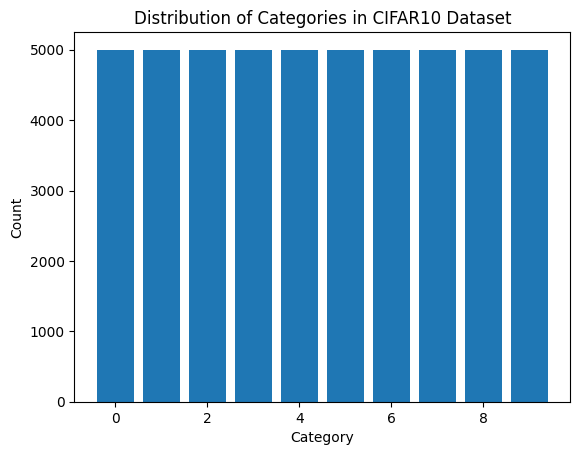

In [10]:
################################################################################################################################
# 2.1.4. Plot the distribution of the categories of the target / label. 
################################################################################################################################
# Get the unique categories
categories = np.unique(y_train)

# Count the number of images in each category
counts = np.zeros(len(categories))
for i in y_train:
    counts[i[0]] += 1

# Plot the distribution of the categories
plt.bar(categories, counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories in CIFAR10 Dataset')
plt.show()
################################################################################################################################
# The plot below shows that the training dataset is balanced across categories... having 5000 images in each category.
################################################################################################################################

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded. 


This stage depends on the dataset that is used. 

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [11]:
##---------Type the code below this line------------------##
################################################################################################################################
# [Normalize the input data:]
# We'll normalize the input images pixels' color value from the range (0, 255) to the range (0, 1).
################################################################################################################################
x_train = x_train/np.ptp(x_train)
x_test = x_test/np.ptp(x_test)

In [12]:
################################################################################################################################
# [Feature Engineering:]
# We'll flatten the target variables from 1x1 arrays into a flat list for easier correspondence with input images.
################################################################################################################################
y_train, y_test = (y_train.reshape(-1,), y_test.reshape(-1,))   #-1 ensures that first dimension is kept as it is; blank 2nd dimension ensures that the other dimensions are flattened.
print(y_train.shape)
print(y_test.shape)

(50000,)
(10000,)


## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [13]:
##---------Type the code below this line------------------##
################################################################################################################################
# Tensorflow's load_data() function separates the dataset in the form (X,y) on its own. Hence, this step isn't required.
################################################################################################################################

# one-hot encoded encoding on the target:
y_train = keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
y_test = keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

In [14]:
target_class_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck',]

## 3.3 Split the data into training set and testing set

In [15]:
##---------Type the code below this line------------------##
################################################################################################
# Tensorflow's load_data() function does this splitting implicitly for us.
# As shown in section 2.1.1., 
#   - the training set consists of 50000 training samples;
#   - the test set consists of 10000 training samples.
################################################################################################

## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


In [16]:
##---------Type the answer below this line------------------##
#################################################################################################################################
# Ours is a very healthy dataset. It doesn't require any of these preprocessing steps.
# Also, instead of being a data-oriented dataset, ours is an image-based dataset. 
#       - Hence, also, doesn't require any of these preprocessing steps.
# We've already one-hot encocded the target values in section 3.2. above; hence, that's not required here either.
#################################################################################################################################
print("Training dataset size: ", x_train.shape)
print("Test dataset size: ", x_test.shape)

Training dataset size:  (50000, 32, 32, 3)
Test dataset size:  (10000, 32, 32, 3)


# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN. 

In [17]:
##---------Type the code below this line------------------##
regularizer = keras.regularizers.L2()
model_5layers = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    # keras.layers.Dense(3000, activation = "relu"),  # hidden layer#1 with 3000 units (because previous flattened layer is supplying 32x32x3 = 3072 elements)
    keras.layers.Dense(1536, activation = "relu", kernel_regularizer=regularizer, bias_regularizer=regularizer),  # hidden layer#1 with 1536 units (complete guesswork here as to why we've choses 1536 nodes)
    keras.layers.Dense(768, activation = "relu", kernel_regularizer=regularizer, bias_regularizer=regularizer),  # hidden layer#2 with 768 units (complete guesswork here as to why we've choses 768 nodes)
    keras.layers.Dense(384, activation = "relu", kernel_regularizer=regularizer, bias_regularizer=regularizer),  # hidden layer#3 with 384 units (complete guesswork here as to why we've choses 384 nodes)
    # keras.layers.Dense(192, activation = "relu"),  # hidden layer#2 with 1000 units (complete guesswork here as to why we've choses 1000 nodes)
    # keras.layers.Dense(96, activation = "relu"),  # hidden layer#2 with 1000 units (complete guesswork here as to why we've choses 1000 nodes)
    # keras.layers.Dense(48, activation = "relu"),  # hidden layer#2 with 1000 units (complete guesswork here as to why we've choses 1000 nodes)
    # keras.layers.Dense(24, activation = "relu"),  # hidden layer#2 with 1000 units (complete guesswork here as to why we've choses 1000 nodes)
    keras.layers.Dense(10, activation='sigmoid'),   # output layer
])

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executin

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters 



In [18]:
##---------Type the answer below this line------------------##
print("Number of layers = ", len(model_5layers.layers))
for i in range(len(model_5layers.layers)):
    print("Number of units in layer #", (i+1), "=", model_5layers.layers[i].output_shape[1])
print("Total number of trainable parameters = ", model_5layers.count_params())

Number of layers =  5
Number of units in layer # 1 = 3072
Number of units in layer # 2 = 1536
Number of units in layer # 3 = 768
Number of units in layer # 4 = 384
Number of units in layer # 5 = 10
Total number of trainable parameters =  6199690


# 5. Training the model

## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [19]:
##---------Type the code below this line------------------##
model_5layers.compile(
    optimizer=keras.optimizers.experimental.SGD(momentum=0.01),    # Gradient descent (with momentum) optimizer, as mandated in section 5.2.
    loss=keras.losses.CategoricalCrossentropy(),    # Categorical CE loss, as mandated above (also required because our target label is one-hot encoded).
    metrics=[
        keras.metrics.Accuracy(),
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        ],
)

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [20]:
##---------Type the code below this line------------------##
with tf.device('/GPU:0'):
    history_5layers_model = model_5layers.fit(x_train,y_train, epochs=20, validation_split=(1/20))

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RepeatDataset in

UnimplementedError: Graph execution error:

Detected at node 'StatefulPartitionedCall_6' defined at (most recent call last):
    File "C:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Program Files\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Program Files\Python310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\Program Files\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\admin\AppData\Local\Temp\ipykernel_2248\2710308037.py", line 3, in <module>
      history_5layers_model = model_5layers.fit(x_train,y_train, epochs=20, validation_split=(1/20))
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 481, in minimize
      self.apply_gradients(grads_and_vars)
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 940, in apply_gradients
      super().apply_gradients(grads_and_vars)
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 526, in apply_gradients
      self._internal_apply_gradients(grads_and_vars)
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 943, in _internal_apply_gradients
      tf.__internal__.distribute.interim.maybe_merge_call(
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 993, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "d:\Tutorials\Python\TensorFlow\tfdml_plugin\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 988, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_6'
Could not find compiler for platform DML: NOT_FOUND: could not find registered compiler for platform DML -- was support for that platform linked in?
	 [[{{node StatefulPartitionedCall_6}}]] [Op:__inference_train_function_1166]

Justify your choice of optimizers and regulizations used and the hyperparameters tuned


In [ ]:
##---------Type the  below this line------------------##
################################################################################################################################
# - SGD Optimier is a relatively simple optimizer to implement and understand.
# - L2 regularization is a simple regularization, which helps to prevent overfitting.
# - Hyperparameters tune:
#       - No. of layers: A 5 layer neural network is a good starting point for a small dataset like CIFAR10. 
#       - Number of neurons per layer: We have chosen 1536, 768, 384, and 10 neurons per layer, respectively. This is a reasonable number of neurons for each layer. A larger number of neurons could potentially improve accuracy, but it would also increase the risk of overfitting.
#       - Learning rate: Used the default SGD optimizer learning rate (0.001), which is a small value to prevent the model from oscillating during training.
#       - Momentum: A momentum of 0.01 is small 
#       - Accuracy metric: Being a balanced data, accuracy is a good metric for model evaluation to train a model on the CIFAR10 dataset.
################################################################################################################################

# 6. Test the model


In [ ]:
##---------Type the code below this line------------------##
lossAndMetrics_5layers_model = model_5layers.evaluate(x_test, y_test,return_dict=True)

# 7. Intermediate result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history. 
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


In [ ]:
##---------Type the code below this line------------------##
# 7.1. Plot the training and validation accuracy history
plt.plot(history_5layers_model.history['accuracy'])
plt.plot(history_5layers_model.history['val_accuracy'])
plt.title('Training and Validation Accuracy History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# 7.2. Plot the training and validation loss history
plt.plot(history_5layers_model.history['loss'])
plt.plot(history_5layers_model.history['val_loss'])
plt.title('Training and Validation Loss History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# 7.3. Report the testing accuracy and loss.
lossAndMetrics_5layers_model

In [ ]:
# 7.4. Show Confusion Matrix for testing dataset.
actualLabels = tf.math.argmax(y_test, axis=1)
predictedLabels = tf.math.argmax(input=model_5layers.predict(x_test), axis=1)
tf.math.confusion_matrix(
    labels=actualLabels,
    predictions=predictedLabels
)

In [ ]:
################################################################################################################################
# 7.5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.
#       - This task is already accomplished in step 7.3. above.
################################################################################################################################

# 8. Model architecture


Modify the architecture designed in section 4.1 

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [ ]:
##---------Type the code below this line------------------##
model_4layers = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(1536, activation = "relu", kernel_regularizer=regularizer, bias_regularizer=regularizer),  # hidden layer#1 with 1536 units (complete guesswork here as to why we've choses 1536 nodes)
    keras.layers.Dense(768, activation = "relu", kernel_regularizer=regularizer, bias_regularizer=regularizer),  # hidden layer#2 with 768 units (complete guesswork here as to why we've choses 768 nodes)
    keras.layers.Dense(10, activation='sigmoid'),   # output layer
])
model_6layers = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(1536, activation = "relu", kernel_regularizer=regularizer, bias_regularizer=regularizer),  # hidden layer#1 with 1536 units (complete guesswork here as to why we've choses 1536 nodes)
    keras.layers.Dense(768, activation = "relu", kernel_regularizer=regularizer, bias_regularizer=regularizer),  # hidden layer#2 with 768 units (complete guesswork here as to why we've choses 768 nodes)
    keras.layers.Dense(384, activation = "relu", kernel_regularizer=regularizer, bias_regularizer=regularizer),  # hidden layer#3 with 384 units (complete guesswork here as to why we've choses 384 nodes)
    keras.layers.Dense(192, activation = "relu"),  # hidden layer#2 with 1000 units (complete guesswork here as to why we've choses 1000 nodes)
    keras.layers.Dense(10, activation='sigmoid'),   # output layer
])

In [ ]:
model_4layers.compile(
    optimizer=keras.optimizers.experimental.SGD(momentum=0.01),    # Gradient descent (with momentum) optimizer, as mandated in section 5.2.
    loss=keras.losses.CategoricalCrossentropy(),    # Categorical CE loss, as mandated above (also required because our target label is one-hot encoded).
    metrics=[
        keras.metrics.Accuracy(),
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        ],
)
model_6layers.compile(
    optimizer=keras.optimizers.experimental.SGD(momentum=0.01),    # Gradient descent (with momentum) optimizer, as mandated in section 5.2.
    loss=keras.losses.CategoricalCrossentropy(),    # Categorical CE loss, as mandated above (also required because our target label is one-hot encoded).
    metrics=[
        keras.metrics.Accuracy(),
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        ],
)
history_4layers_model = model_4layers.fit(x_train,y_train, epochs=20, validation_split=(1/20))
history_6layers_model = model_6layers.fit(x_train,y_train, epochs=20, validation_split=(1/20))

In [ ]:
################################################################################################################################################
# Comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)
################################################################################################################################################
plt.plot(history_4layers_model.history['accuracy'])
plt.plot(history_4layers_model.history['val_accuracy'])
plt.plot(history_5layers_model.history['accuracy'])
plt.plot(history_5layers_model.history['val_accuracy'])
plt.plot(history_6layers_model.history['accuracy'])
plt.plot(history_6layers_model.history['val_accuracy'])
plt.title('Training and Validation Accuracy History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([
    '4-Layers Training Accuracy', '4-Layers Validation Accuracy', 
    '5-Layers Training Accuracy', '5-Layers Validation Accuracy', 
    '6-Layers Training Accuracy', '6-Layers Validation Accuracy', 
    ], 
    loc='upper left')
plt.show()

# 9. Regularisations

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04. 

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [ ]:
##---------Type the code below this line------------------##
################################################################
# 9.1. 5-layered model with dropout, without regularization.
################################################################
model_5layers_withDropout_WithoutRegularization = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(1536, activation = "relu", ),  # hidden layer#1 with 1536 units (complete guesswork here as to why we've choses 1536 nodes)
    keras.layers.Dropout(rate=0.25),                 # Dropout layer of ratio 0.25.
    keras.layers.Dense(768, activation = "relu",),  # hidden layer#2 with 768 units (complete guesswork here as to why we've choses 768 nodes)
    keras.layers.Dropout(rate=0.25),                 # Dropout layer of ratio 0.25.
    keras.layers.Dense(384, activation = "relu",),  # hidden layer#3 with 384 units (complete guesswork here as to why we've choses 384 nodes)
    keras.layers.Dropout(rate=0.25),                 # Dropout layer of ratio 0.25.
    keras.layers.Dense(10, activation='sigmoid'),   # output layer
])
################################################################################################################################
# 9.2. 5-layered model with dropout, with L2 regularization with factor 1e-04.
################################################################################################################################
regularizer2 = keras.regularizers.L2(l2 = 1e-04)
model_5layers_withDropout_WithRegularization = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(1536, activation = "relu", ),  # hidden layer#1 with 1536 units (complete guesswork here as to why we've choses 1536 nodes)
    keras.layers.Dropout(rate=0.25),                 # Dropout layer of ratio 0.25.
    keras.layers.Dense(768, activation = "relu",),  # hidden layer#2 with 768 units (complete guesswork here as to why we've choses 768 nodes)
    keras.layers.Dropout(rate=0.25),                 # Dropout layer of ratio 0.25.
    keras.layers.Dense(384, activation = "relu",),  # hidden layer#3 with 384 units (complete guesswork here as to why we've choses 384 nodes)
    keras.layers.Dropout(rate=0.25),                 # Dropout layer of ratio 0.25.
    keras.layers.Dense(10, activation='sigmoid'),   # output layer
])

In [ ]:
model_5layers_withDropout_WithoutRegularization.compile(
    optimizer=keras.optimizers.experimental.SGD(momentum=0.01),    # Gradient descent (with momentum) optimizer, as mandated in section 5.2.
    loss=keras.losses.CategoricalCrossentropy(),    # Categorical CE loss, as mandated above (also required because our target label is one-hot encoded).
    metrics=[
        keras.metrics.Accuracy(),
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        ],
)
model_5layers_withDropout_WithRegularization.compile(
    optimizer=keras.optimizers.experimental.SGD(momentum=0.01),    # Gradient descent (with momentum) optimizer, as mandated in section 5.2.
    loss=keras.losses.CategoricalCrossentropy(),    # Categorical CE loss, as mandated above (also required because our target label is one-hot encoded).
    metrics=[
        keras.metrics.Accuracy(),
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        ],
)

In [ ]:
history_5layers_model_withDropout_WithoutRegularization = model_5layers_withDropout_WithoutRegularization.fit(x_train,y_train, epochs=20, validation_split=(1/20))
history_5layers_model_withDropout_WithRegularization = model_5layers_withDropout_WithRegularization.fit(x_train,y_train, epochs=20, validation_split=(1/20))

In [ ]:
################################################################################################################################################
# Comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)
################################################################################################################################################
plt.plot(history_5layers_model.history['accuracy'])
plt.plot(history_5layers_model.history['val_accuracy'])
plt.plot(history_5layers_model_withDropout_WithoutRegularization.history['accuracy'])
plt.plot(history_5layers_model_withDropout_WithoutRegularization.history['val_accuracy'])
plt.plot(history_5layers_model_withDropout_WithRegularization.history['accuracy'])
plt.plot(history_5layers_model_withDropout_WithRegularization.history['val_accuracy'])
plt.title('Training and Validation Accuracy History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([
    '5-Layers (w/o Dropout, with L2 Regularization) Training Accuracy', '5-Layers Training (w/o Dropout, with L2 Regularization) Validation Accuracy', 
    '5-Layers (with Dropout, w/o Regularization) Training Accuracy', '5-Layers (with Dropout, w/o Regularization) Validation Accuracy', 
    '5-Layers (with Dropout, with L2 Regularization) Training Accuracy', '5-Layers (with Dropout, with L2 Regularization) Validation Accuracy', 
    ], 
    loc='upper left')
plt.show()

# 10. Optimisers

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [ ]:
##---------Type the code below this line------------------##
model_5layers.compile(
    optimizer=keras.optimizers.experimental.RMSprop(learning_rate=0.01),    # RMSProp optimizer, as mandated in section 10.1.
    loss=keras.losses.CategoricalCrossentropy(),    # Categorical CE loss, as mandated above (also required because our target label is one-hot encoded).
    metrics=[
        keras.metrics.Accuracy(),
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        ],
)
history_5layers_model_RMSProp = model_5layers.fit(x_train,y_train, epochs=20, validation_split=(1/20))

In [ ]:
model_5layers.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),    # Adam optimizer, as mandated in section 10.2.
    loss=keras.losses.CategoricalCrossentropy(),    # Categorical CE loss, as mandated above (also required because our target label is one-hot encoded).
    metrics=[
        keras.metrics.Accuracy(),
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        ],
)
history_5layers_model_Adam = model_5layers.fit(x_train,y_train, epochs=20, validation_split=(1/20))

# 11. Conclusion

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [ ]:
##---------Type the code below this line------------------##